## <u>Python for AI-ML</u>

# Self Paced Module - Web Scraping

# Use Case-1: WeAid Services


### Problem Statement
Employees at WeAid Services have gone through a stressful series of projects. The HR team at WeAid Services wants to give their employees a vacation around all its branches. Going through each of the package manually would be very hard and collecting data as well. They have to find a way to automate this process of data collection.

### Solution:

Scraping the website holidify.com to fetch the relevant results using:
- BeautifulSoup
- Requests


### Tasks to be Performed:

1. Send request to holidify.com 
2. Parse the data to get the country names
3. Send requests to get the response for all country names
4. Parse the data for each country
5. Organize the data into single dataframe
6. Create a new feature to get total number of places will be visited in the package
7. Clean the data
8. Find the longest package time duration for each country
9. Find the largest number place visits in a single package for each country

## Importing Required Libraries

In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd

### 1. Send request to holidify.com

In [2]:
req=rq.get('https://www.holidify.com/')

### 2. Parse the data to get the country names

In [3]:
# Creating soup object
soup=BeautifulSoup(req.content)

#### Inspecting the webpage to get the country names

---

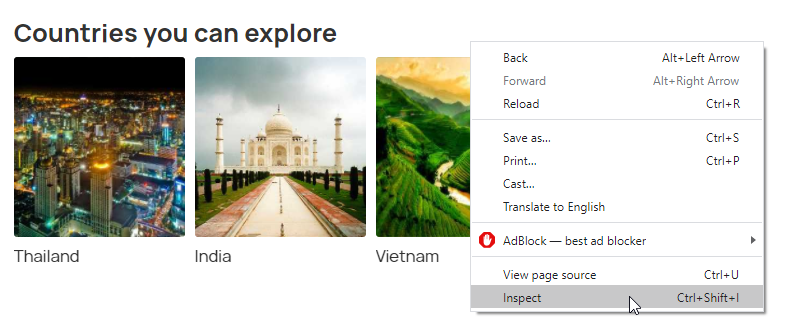

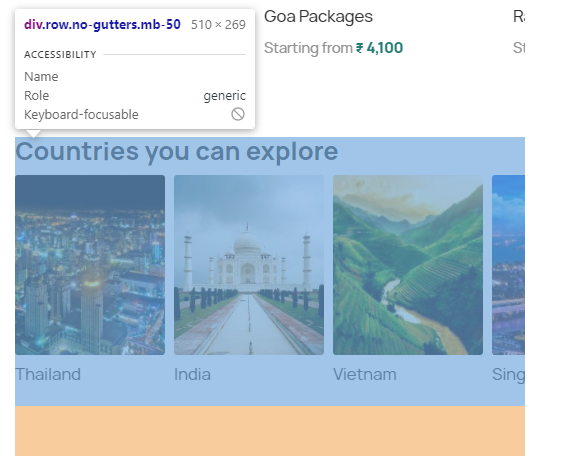

All the required content is in _**DIV** TAG_ with **_class: row no-gutters mb-50_**

---

In [4]:
# Find all the div tags  with class: row no-gutters mb-50
major_div=soup.find_all('div',class_='row no-gutters mb-50' )

<hr>

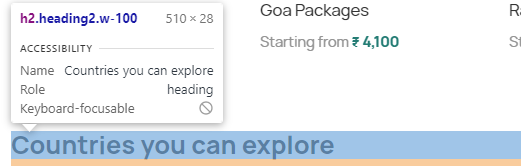

The text is under __H2__ Tag. We can filter this content.

In [5]:
# filtering the h2 tag with countries in the text
country=None
for i in major_div:
    if i.h2!=None:
        if 'Countries' in i.h2.text:
            country=i

---

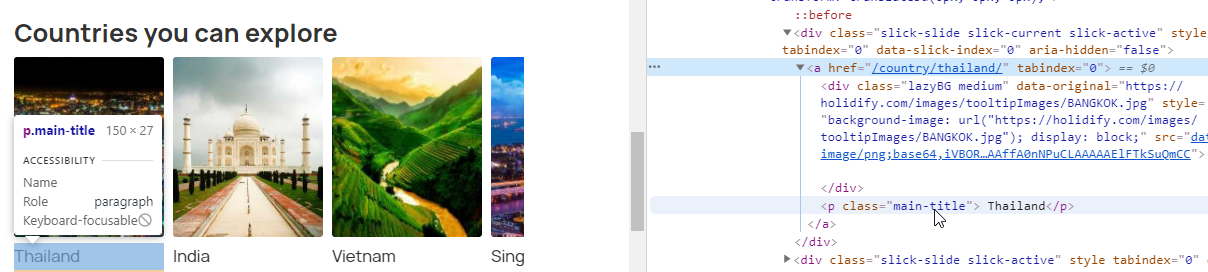

All the country names are under __p__ Tag which is child of __a__ tag.

In [6]:
# Getting all the a tags
c_list=country.find_all('a')

In [7]:
# Getting all the country names
for i in range(len(c_list)):
    c_list[i]=c_list[i].p.text.strip()

In [8]:
print('Country names: ',*c_list,sep='\n')

Country names: 
Thailand
India
Vietnam
Singapore
Bhutan
UAE
Indonesia


### 3. Send requests to get the response for all country names

In [9]:
# Getting requests for each country
r_dict={'Country':c_list,'Request':[]}
for i in c_list:
    req=rq.get('https://www.holidify.com/country/'+i+'/packages.html')
    r_dict['Request'].append(req)

### 4. Parse the data for each country

For each country we will be dealing with similar type of webpage so let's start with the inspection of webpage.

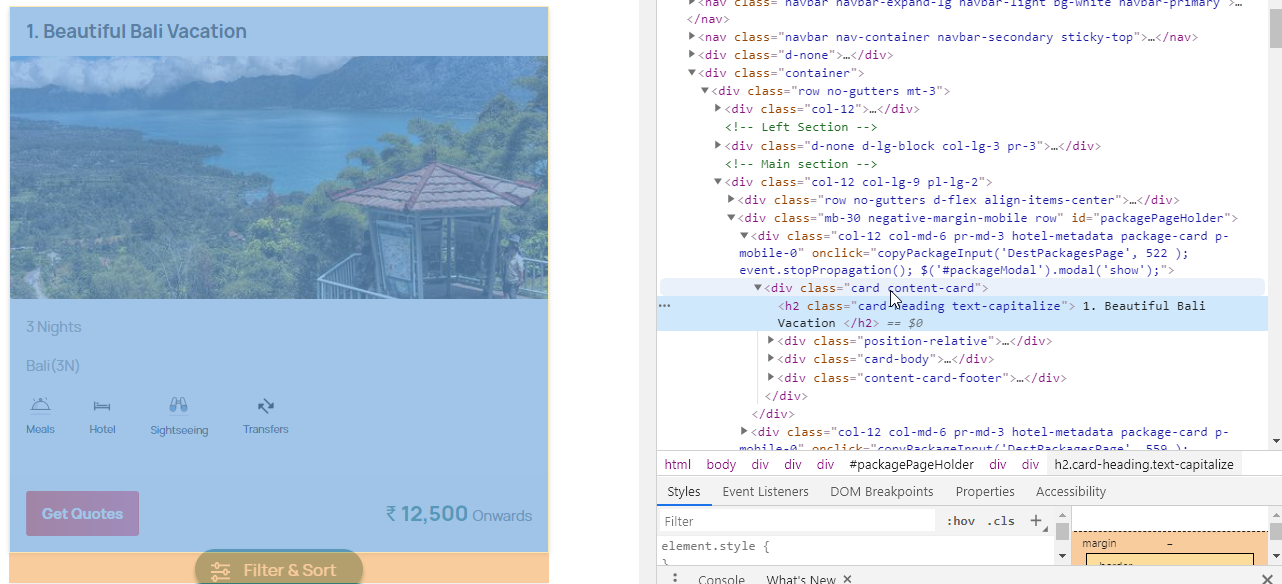

Data for each package is in a special __DIV__ tag which has a class named __card content-card__.

- Place name is under __H2__ Tag.

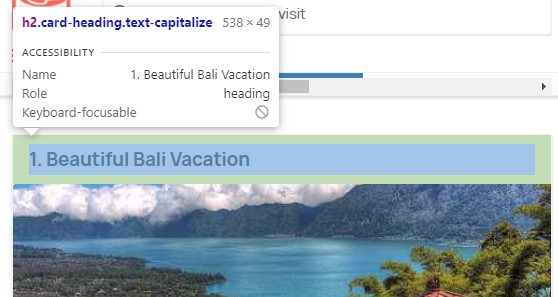

- Time is under __P__ Tag with class _objective_

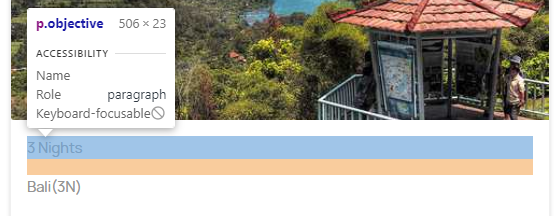

- Places visited in the package are in __P__ tag with class __places-covered__.

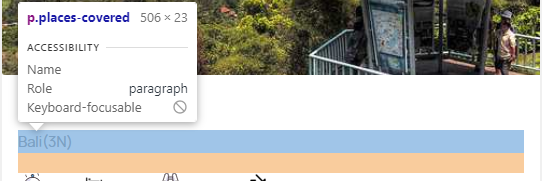

- Price is under __span__ tag with class _price default_

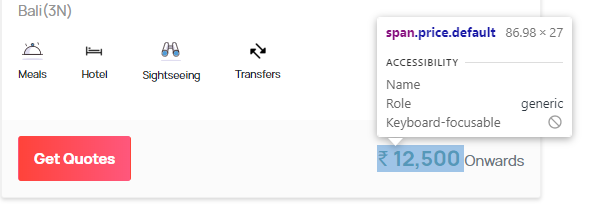

In [10]:
def getInfo(containers):
    data={'Place':[],'Time':[],'Places_covered':[],'Price_dollars':[]}
    for container in containers:
        place=container.h2.text.strip().split('.')[1] # Place
        time=container.find('p',class_='objective').text.strip() # time
        plc=container.find('p',class_='places-covered').text.strip() # places
        price=container.find('span',class_='price default').text.strip() # price
        data['Place'].append(place)
        data['Time'].append(time)
        data['Places_covered'].append(plc)
        data['Price_dollars'].append(price.split(' ')[1])
    return data

In [11]:
def soupIt(req,name):
    soup=BeautifulSoup(req.content,'html.parser')
    containers = soup.findAll("div", {"class" : "card content-card"})
    print('>>> Containers Found:',len(containers),name)
    temp_dict=getInfo(containers)
    temp_dict['Country']=[name]*len(containers)
    return temp_dict

In [12]:
final_dict={'Place':[],'Time':[],'Places_covered':[],'Price_dollars':[],'Country':[]}
for i in range(len(r_dict['Country'])):
    temp_dict=soupIt(r_dict['Request'][i],r_dict['Country'][i])
    for i in temp_dict.keys():
        final_dict[i].extend(temp_dict[i])

>>> Containers Found: 82 Thailand
>>> Containers Found: 18 India
>>> Containers Found: 27 Vietnam
>>> Containers Found: 0 Singapore
>>> Containers Found: 28 Bhutan
>>> Containers Found: 30 UAE
>>> Containers Found: 73 Indonesia


In [13]:
singapore_rq=rq.get('https://www.holidify.com/places/singapore/packages.html')
sg_data=soupIt(singapore_rq,'Singapore')
for i in sg_data.keys():
    final_dict[i].extend(sg_data[i])

>>> Containers Found: 61 Singapore


### 5. Organize the data into single dataframe

In [14]:
data=pd.DataFrame(final_dict)
nplaces=data.Places_covered.str.split('→')

#### 6. Create a new feature to get total number of places will be visited in the package

In [15]:
def clen(npl):
    q=[]
    for i in npl:
        q.append(len(i))
    return q
data['Places_count']=clen(nplaces)

#### 7. Clean the data

In [16]:
data.Time=data.Time.str.replace('Nights','')
data.head()

Place Time  \
0   Triple Dhamaka Package - Bangkok, Phuket and ...   6    
1   Beachy Vibes in Bangkok, Phi Phi Islands, Kra...   7    
2   Thailand Budget Special - Krabi, Phuket, Patt...   7    
3                                 Indulge in Bangkok   3    
4   Outstanding Hua Hin, Bangkok, Pattaya Package...   6    

                                      Places_covered Price_dollars   Country  \
0  Bangkok (2N) →  Phuket (2N) →  Phi Phi Islands...           279  Thailand   
1  Bangkok (2N) →  Phi Phi Islands ( 2N) →  Krabi...           326  Thailand   
2  Krabi (1N) →  Phuket (2N) →  Pattaya (2N) →  B...           215  Thailand   
3                                       Bangkok (3N)           289  Thailand   
4       Bangkok (2N) →  Pattaya (2N) →  Hua Hin (2N)           303  Thailand   

   Places_count  
0             3  
1             4  
2             4  
3             1  
4             3

In [17]:
# Saving the data
data.to_csv('vacations.csv',index=None)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place           319 non-null    object
 1   Time            319 non-null    object
 2   Places_covered  319 non-null    object
 3   Price_dollars   319 non-null    object
 4   Country         319 non-null    object
 5   Places_count    319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [133]:
data.Price_dollars=data.Price_dollars.str.replace(',','')

In [134]:
data.Time= data.Time.astype(int)
data.Price_dollars=data.Price_dollars.astype(int)

#### 8. Find the longest package time duration for each country

In [123]:
# Group the data by Country and find highest longest duration
epty=pd.DataFrame({'Place':[] ,'Time':[] ,'Places_covered':[] ,'Price_dollars':[] ,'Country':[] ,'Places_count':[]})
for grp, gata in data.groupby('Country'):
    m=gata.Time.max()
    out=gata[gata.Time>=m]
    epty=epty.append(out)

In [124]:
longest_time=pd.DataFrame(epty)
longest_time.sort_values(by='Places_count',ascending=False)

Place  Time  \
95              Fabulous Jaipur, Delhi, Mandawa & More  13.0   
148                   Fascinating Paro, Thimphu & More  10.0   
147                 Magnificent Thimpu, Punakha & More  10.0   
112   Grand Vietnam Tour - Ho Chi Minh City, Nha Tr...  10.0   
191        Beautiful Nusa Dua, Kuta, Seminyak and Ubud   9.0   
288   Grand Asia Tour Singapore, Thailand, Malaysia...  11.0   
22    Grand Asia Tour Thailand, Singapore, Malaysia...  11.0   
113   Extraordinary Budget Special - Hanoi, Phnom P...  10.0   
254   Charms of Indonesia - Batam Island, Jakarta, ...   9.0   
160   Grand Tour of Dubai, Yas Island, Abu Dhabi Pa...   8.0   
316   Thrilling Budget Singapore, Auckland, Rotorua...  11.0   

                                        Places_covered Price_dollars  \
95   Delhi → Mandawa → Bikaner → Jaisalmer → Jodhpu...           659   
148  Paro(2N) → Thimphu(1N) → Punakha(1N) → Phobjik...           806   
147  Thimpu(1N) → Punakha(1N) → Phobjikha(1N) → Tro...           782   
112  Ho Chi Minh City (3N) →  Nha Trang (2N) →  Hoi...           408   
191  Nusa Dua (2N) →  Kuta (3N) →  Seminyak (2N) → ...           379   
288  Thailand (3N) →  Kuala Lampur (3N) →  Singapor...           736   
22   Thailand (3N) →  Kuala Lampur (3N) →  Singapor...           736   
113  Hanoi (3N) →  Ho Chi Minh (2N) →  Phnom Penh (...           198   
254  Batam Island (2N) →  Jakarta (1N) →  Bali (3N)...           430   
160    Dubai (4N) →  Yas Island (1N) →  abu dhabi (3N)           559   
316  Singapore (2N) Auckland (2N) Rotorua (2N) Quee...           570   

       Country  Places_count  
95       India           9.0  
148     Bhutan           8.0  
147     Bhutan           7.0  
112    Vietnam           6.0  
191  Indonesia           4.0  
288  Singapore           4.0  
22    Thailand           4.0  
113    Vietnam           4.0  
254  Indonesia           3.0  
160        UAE           3.0  
316  Singapore           1.0

#### 9. Find the largest number place visits in a single package for each country

In [118]:
# Group the data by Country and find highest place count
epty=pd.DataFrame({'Place':[] ,'Time':[] ,'Places_covered':[] ,'Price_dollars':[] ,'Country':[] ,'Places_count':[]})
for grp, gata in data.groupby('Country'):
    m=gata.Places_count.max()
    out=gata[gata.Places_count>=m]
    epty=epty.append(out)    

In [122]:
large_pc=pd.DataFrame(epty)
large_pc.sort_values(by='Places_count',ascending=False)

Place  Time  \
95              Fabulous Jaipur, Delhi, Mandawa & More  13.0   
148                   Fascinating Paro, Thimphu & More  10.0   
112   Grand Vietnam Tour - Ho Chi Minh City, Nha Tr...  10.0   
14    Big 5 Tour - Bangkok, Phuket, Krabi, Pattaya ...  10.0   
191        Beautiful Nusa Dua, Kuta, Seminyak and Ubud   9.0   
216            Super Saver Lombok, Kuta, Ubud and More   7.0   
231   Mesmerizing Package: Medan, Berastagi, Lake T...   4.0   
288   Grand Asia Tour Singapore, Thailand, Malaysia...  11.0   
310   Money-Saver Package - Singapore, Kuala Lumpur...   9.0   
159   Romantic Dubai , Ras Al Khaimah, Yas Island a...   5.0   
160   Grand Tour of Dubai, Yas Island, Abu Dhabi Pa...   8.0   
182   Astounding Budget Dubai, Sharjah, Ras al Khai...   6.0   

                                        Places_covered Price_dollars  \
95   Delhi → Mandawa → Bikaner → Jaisalmer → Jodhpu...           659   
148  Paro(2N) → Thimphu(1N) → Punakha(1N) → Phobjik...           806   
112  Ho Chi Minh City (3N) →  Nha Trang (2N) →  Hoi...           408   
14   Bangkok (2N) →  Phuket (2N) →  Krabi (2N) →  P...           443   
191  Nusa Dua (2N) →  Kuta (3N) →  Seminyak (2N) → ...           379   
216  Kuta (2N) →  Ubud (2N) →  Lombok (2N) →  Gili ...           213   
231  Berastagi (1N) →  Lake Toba (1N) →  Medan (1N)...           156   
288  Thailand (3N) →  Kuala Lampur (3N) →  Singapor...           736   
310  Pattaya (2N) →  Bangkok (2N) →  Kuala Lumpur (...           234   
159  Ras Al Khaimah(1N) → Yas Island Abu Dhabi(1N) ...           610   
160    Dubai (4N) →  Yas Island (1N) →  abu dhabi (3N)           559   
182  Dubai (2N) →  Sharjah (3N) →  Ras al khaimah (1N)           214   

       Country  Places_count  
95       India           9.0  
148     Bhutan           8.0  
112    Vietnam           6.0  
14    Thailand           5.0  
191  Indonesia           4.0  
216  Indonesia           4.0  
231  Indonesia           4.0  
288  Singapore           4.0  
310  Singapore           4.0  
159        UAE           3.0  
160        UAE           3.0  
182        UAE           3.0

#### 10. Find the 5 cheapest packages for each country

In [135]:
# Group the data by Country and find highest place count
epty=pd.DataFrame({'Place':[] ,'Time':[] ,'Places_covered':[] ,'Price_dollars':[] ,'Country':[] ,'Places_count':[]})
for grp, gata in data.groupby('Country'):
    out=gata.sort_values(by='Price_dollars').head()
    epty=epty.append(out)    

In [137]:
cheap=pd.DataFrame(epty)
cheap.sort_values(by='Price_dollars',ascending=True)

Place  Time  \
212                        Pocket-Friendly Lombok Deal   2.0   
87                                   Majestic Varanasi   3.0   
239         Exciting Package: Medan and Berastagi Tour   3.0   
241       Magnficient Budget  Medan, Lake Toba Package   3.0   
238                   Stunning Budget -  Medan Package   3.0   
245                          Simply Medan Package Tour   2.0   
105                        Astonishing Halong Bay Tour   2.0   
103   Pocket Friendly Halong Bay, Hanoi, Ho Chi Min...   4.0   
68                Impressive Budget Chiang Mai Package   3.0   
9                   Simply Bangkok - Shopping and More   3.0   
75                                        Simply Krabi   3.0   
102        Amazing Budget Halong Bay and Hanoi Package   5.0   
123                Thrilling Budget Danang, Hanoi Tour   5.0   
66    Dreamy Budget Holiday - Krabi and Phi Phi isl...   3.0   
99                                     Memorable Spiti   6.0   
272                          Simply Stunning Singapore   2.0   
21                     Majestic Pattaya & Bangkok Tour   4.0   
97                                      Tranquil Spiti   5.0   
162                                     Splendid Dubai   3.0   
85                         Serene Kochi, Munnar & More   5.0   
104                             Essentially Halong Bay   3.0   
290     Singapore - Shop Till You Drop Special Package   2.0   
307                            Splendid Singapore Tour   3.0   
82                Magical Jaisalmer, Jodhpur & Udaipur   5.0   
312   Super Saver Singapore with Batam and Bintan I...   7.0   
168                  Pocket Friendly Abu Dhabi Package   4.0   
169                               Panoramic Dubai Tour   3.0   
152   Pocket Friendly Bhutan - Thimphu, Punakha, Pa...   6.0   
150     Gems of Bhutan - Thimpu, Punakha and Paro Tour   5.0   
182   Astounding Budget Dubai, Sharjah, Ras al Khai...   6.0   
183                                Charming Dubai Tour   4.0   
310   Money-Saver Package - Singapore, Kuala Lumpur...   9.0   
127                    Blissful Thimphu & Paro Package   3.0   
128                        Verdant Thimphu & Paro Tour   3.0   
129                 Enchanting Thimphu & Paro Vacation   5.0   

                                        Places_covered  Price_dollars  \
212                                        Lombok (2N)           51.0   
87                                        Varanasi(3N)           56.0   
239                        Berastagi (1N) & Medan (2N)           67.0   
241         Medan (2N) →  Lake Toba  (1N) Tour Package           71.0   
238                                         Medan (3N)           72.0   
245                                         Medan (2N)           74.0   
105                                    Halong Bay (2N)           82.0   
103  Hanoi (1N) →  Halong Bay (2N) →  Ho Chi Minh C...           89.0   
68                                     Chiang Mai (3N)           91.0   
9                                         Bangkok (3N)           95.0   
75                                          Krabi (3N)           99.0   
102                      Hanoi (2N) →  Halong Bay (3N)          102.0   
123                          Hanoi (3N) →  Danang (2N)          104.0   
66                  Krabi (2N) →  Phi phi islands (1N)          104.0   
99                                           Spiti(6N)          105.0   
272                                      Singapore(2N)          111.0   
21                           Pattaya(2N) → Bangkok(2N)          112.0   
97                                           Spiti(5N)          113.0   
162                                         Dubai (3N)          114.0   
85   Kochi(1N) → Munnar(2N) → Thekkady(1N) → Alappu...          118.0   
104                                    Halong Bay (3N)          123.0   
290                                     Singapore (2N)          137.0   
307                                      Singapore(3N)          1